## Business Understanding:

The aim of this project is to answer the following four questions:

1. Which region are the lowest and highest prices of Avocado?
2. What is the highest region of avocado production?
3. What is the average avocado prices in each year?
4. What is the average avocado volume in each year?

## Data Understanding:

The Avocado Dataset contains 13 columns:

1. Date - The date of the observation
2. AveragePrice: the average price of a single avocado
3. Total Volume: Total number of avocados sold
4. Total Bags: Total number  o bags
5. Small Bags: Total number of Small bags
6. Large Bags: Total number of Large bags
7. XLarge Bags: Total number of XLarge bags
8. type: conventional or organic
9. year: the year
10. region: the city or region of the observation
11. 4046: Total number of avocados with PLU 4046 sold
12. 4225: Total number of avocados with PLU 4225 sold
13. 4770: Total number of avocados with PLU 4770 sold

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\7.30 PM DATA SCIENCE AND AI\DAILY SESSION MATERIALS\OCT\2nd- reg resume project\RESUME PROJECT -- AVOCADO PRICE PREDICTION\avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.shape

(18249, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


## EDA :

In [8]:
df.values

array([[0, '2015-12-27', 1.33, ..., 'conventional', 2015, 'Albany'],
       [1, '2015-12-20', 1.35, ..., 'conventional', 2015, 'Albany'],
       [2, '2015-12-13', 0.93, ..., 'conventional', 2015, 'Albany'],
       ...,
       [9, '2018-01-21', 1.87, ..., 'organic', 2018, 'WestTexNewMexico'],
       [10, '2018-01-14', 1.93, ..., 'organic', 2018, 'WestTexNewMexico'],
       [11, '2018-01-07', 1.62, ..., 'organic', 2018, 'WestTexNewMexico']],
      dtype=object)

In [9]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

## 1. Sorting:

In [10]:
df.sort_values(['AveragePrice', 'year'], ascending=[True, False])

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
15261,43,2017-03-05,0.44,64057.04,223.84,4748.88,0.00,59084.32,638.68,58445.64,0.00,organic,2017,CincinnatiDayton
7412,47,2017-02-05,0.46,2200550.27,1200632.86,531226.65,18324.93,450365.83,113752.17,330583.10,6030.56,conventional,2017,PhoenixTucson
15473,43,2017-03-05,0.48,50890.73,717.57,4138.84,0.00,46034.32,1385.06,44649.26,0.00,organic,2017,Detroit
15262,44,2017-02-26,0.49,44024.03,252.79,4472.68,0.00,39298.56,600.00,38698.56,0.00,organic,2017,CincinnatiDayton
1716,0,2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.00,conventional,2015,PhoenixTucson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16720,18,2017-08-27,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.00,organic,2017,RaleighGreensboro
16055,42,2017-03-12,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.00,organic,2017,MiamiFtLauderdale
14124,7,2016-11-06,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.00,organic,2016,SanFrancisco
17428,37,2017-04-16,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.00,organic,2017,Tampa


## 2. Subsetting

In [11]:
df['AveragePrice']

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

### Subsetting multiple columns

In [12]:
df[['AveragePrice', 'year']]

,AveragePrice,year
0,1.33,2015
1,1.35,2015
2,0.93,2015
3,1.08,2015
4,1.28,2015
...,...,...
18244,1.63,2018
18245,1.71,2018
18246,1.87,2018
18247,1.93,2018


### Subsetting Row

In [13]:
df['AveragePrice']<1

0        False
1        False
2         True
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Name: AveragePrice, Length: 18249, dtype: bool

In [14]:
df[df['AveragePrice']<1]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
13,13,2015-09-27,0.99,106803.39,1204.88,99409.21,154.84,6034.46,5888.87,145.59,0.0,conventional,2015,Albany
43,43,2015-03-01,0.99,55595.74,629.46,45633.34,181.49,9151.45,8986.06,165.39,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17169,43,2017-03-05,0.99,155011.12,35367.23,5175.81,5.91,114462.17,95379.07,19083.10,0.0,organic,2017,SouthCentral
17170,44,2017-02-26,0.99,171145.00,34520.03,6936.39,0.00,129688.58,117252.31,12436.27,0.0,organic,2017,SouthCentral
17536,39,2017-04-02,0.98,402676.23,34093.33,58330.53,207.85,310044.52,155701.41,154343.11,0.0,organic,2017,West
17537,40,2017-03-26,0.90,456645.91,36169.35,51398.72,139.55,368938.29,152159.53,216778.76,0.0,organic,2017,West


### Subsetting based on Text Data

In [15]:
df[df['type']=='organic']

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9126,0,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany
9127,1,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany
9128,2,2015-12-13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany
9129,3,2015-12-06,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany
9130,4,2015-11-29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Subsetting based on multiple conditions

In [16]:
df[(df['AveragePrice']<1) & (df['type']=='organic')]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9282,0,2015-12-27,0.91,2272.26,15.53,508.49,0.00,1748.24,1008.20,740.04,0.0,organic,2015,Boise
9284,2,2015-12-13,0.87,4054.49,26.21,738.96,2.58,3286.74,1147.38,2139.36,0.0,organic,2015,Boise
9679,33,2015-05-10,0.81,29694.82,967.36,17214.80,1.11,11511.55,433.31,11078.24,0.0,organic,2015,Columbus
9680,34,2015-05-03,0.89,28020.38,961.24,18774.04,2.21,8282.89,503.27,7779.62,0.0,organic,2015,Columbus
9753,3,2015-12-06,0.92,41324.90,3841.78,8059.68,33.27,29390.17,430.00,28960.17,0.0,organic,2015,Denver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17169,43,2017-03-05,0.99,155011.12,35367.23,5175.81,5.91,114462.17,95379.07,19083.10,0.0,organic,2017,SouthCentral
17170,44,2017-02-26,0.99,171145.00,34520.03,6936.39,0.00,129688.58,117252.31,12436.27,0.0,organic,2017,SouthCentral
17536,39,2017-04-02,0.98,402676.23,34093.33,58330.53,207.85,310044.52,155701.41,154343.11,0.0,organic,2017,West
17537,40,2017-03-26,0.90,456645.91,36169.35,51398.72,139.55,368938.29,152159.53,216778.76,0.0,organic,2017,West


### Subsetting using .isin():

In [17]:
regionFilter = df['region'].isin(['Boston','SanDiego'])
df[regionFilter]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
208,0,2015-12-27,1.13,450816.39,3886.27,346964.70,13952.56,86012.86,85913.60,99.26,0.0,conventional,2015,Boston
209,1,2015-12-20,1.07,489802.88,4912.37,390100.99,5887.72,88901.80,88768.47,133.33,0.0,conventional,2015,Boston
210,2,2015-12-13,1.01,549945.76,4641.02,455362.38,219.40,89722.96,89523.38,199.58,0.0,conventional,2015,Boston
211,3,2015-12-06,1.02,488679.31,5126.32,407520.22,142.99,75889.78,75666.22,223.56,0.0,conventional,2015,Boston
212,4,2015-11-29,1.19,350559.81,3609.25,272719.08,105.86,74125.62,73864.52,261.10,0.0,conventional,2015,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18100,7,2018-02-04,1.81,17454.74,1158.41,7388.27,0.00,8908.06,8908.06,0.00,0.0,organic,2018,SanDiego
18101,8,2018-01-28,1.91,17579.47,1145.64,8284.41,0.00,8149.42,8149.42,0.00,0.0,organic,2018,SanDiego
18102,9,2018-01-21,1.95,18676.37,1088.49,9282.37,0.00,8305.51,8305.51,0.00,0.0,organic,2018,SanDiego
18103,10,2018-01-14,1.81,21770.02,3285.98,14338.52,0.00,4145.52,4145.52,0.00,0.0,organic,2018,SanDiego


### Multiple parameter Filtering:

In [18]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## 3. Adding a new column:

In [19]:
df['AveragePricePer100'] = df['AveragePrice']*100

In [20]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePricePer100
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,133.0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,135.0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,93.0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,108.0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,128.0


### Removing the column

In [21]:
df.drop('AveragePricePer100', axis=1)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [22]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePricePer100
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,133.0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,135.0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,93.0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,108.0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,128.0


## 4. Summary Statistics:

In [23]:
df['AveragePrice'].mean()

1.405978409775878

In [24]:
df['Date'].max()

'2018-03-25'

## 5. Checking the 30, 50 quantiles:

In [25]:
def pct30(column):
    return column.quantile(0.3)

def pct50(column):
    return column.quantile(0.5)

In [26]:
df[['AveragePrice', 'Total Bags']].agg([pct30, pct50])

,AveragePrice,Total Bags
pct30,1.15,7316.634
pct50,1.37,39743.830


## 6. Count categorical data

In [27]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

## 7. Grouped summaries

In [28]:
df.groupby(['year','type'])['AveragePrice'].agg([min, max, np.mean, np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

## 8. Pivot table:

In [29]:
df.pivot_table(index=['year','type'], aggfunc=[min, max, np.mean, np.median], values='AveragePrice')

min          max         mean       median
                  AveragePrice AveragePrice AveragePrice AveragePrice
year type                                                            
2015 conventional         0.49         1.59     1.077963         1.08
     organic              0.81         2.79     1.673324         1.67
2016 conventional         0.51         2.20     1.105595         1.08
     organic              0.58         3.25     1.571684         1.53
2017 conventional         0.46         2.22     1.294888         1.30
     organic              0.44         3.17     1.735521         1.72
2018 conventional         0.56         1.74     1.127886         1.14
     organic              1.01         2.30     1.567176         1.55

## 9. Explicit indexes

In [30]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePricePer100
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,133.0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,135.0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,93.0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,108.0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,163.0
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,171.0
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,187.0
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,193.0


In [31]:
regionIndex = df.set_index(['region'])

In [32]:
regionIndex

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,AveragePricePer100
region,,,,,,,,,,,,,,
Albany,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,133.0
Albany,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,135.0
Albany,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,93.0
Albany,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,108.0
Albany,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WestTexNewMexico,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,163.0
WestTexNewMexico,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,171.0
WestTexNewMexico,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,187.0


In [33]:
rf = df['region'].isin(['Albany', 'WestTexNewMexico	'])
df[rf]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePricePer100
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,133.0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,135.0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,93.0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,108.0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17608,7,2018-02-04,1.52,4124.96,118.38,420.36,0.00,3586.22,3586.22,0.00,0.0,organic,2018,Albany,152.0
17609,8,2018-01-28,1.32,6987.56,433.66,374.96,0.00,6178.94,6178.94,0.00,0.0,organic,2018,Albany,132.0
17610,9,2018-01-21,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.0,organic,2018,Albany,154.0
17611,10,2018-01-14,1.47,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.0,organic,2018,Albany,147.0


In [34]:
regionIndex.loc[['Albany','WestTexNewMexico']]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,AveragePricePer100
region,,,,,,,,,,,,,,
Albany,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,133.0
Albany,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,135.0
Albany,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,93.0
Albany,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,108.0
Albany,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WestTexNewMexico,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,163.0
WestTexNewMexico,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,171.0
WestTexNewMexico,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,187.0


## 10. Visualization

### 1] Histogram

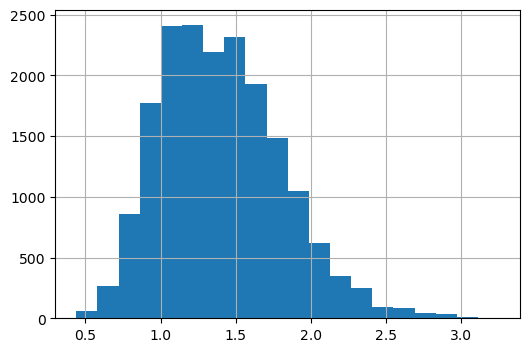

In [35]:
plt.figure(figsize=(6,4))
df['AveragePrice'].hist(bins=20)
plt.show()

### 2] Bar Plot

In [36]:
regionFilter = df.groupby('region')['AveragePrice'].mean().head(10)
regionFilter

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
California             1.395325
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Name: AveragePrice, dtype: float64

<Axes: title={'center': 'Average price in 10 regions'}, xlabel='region'>

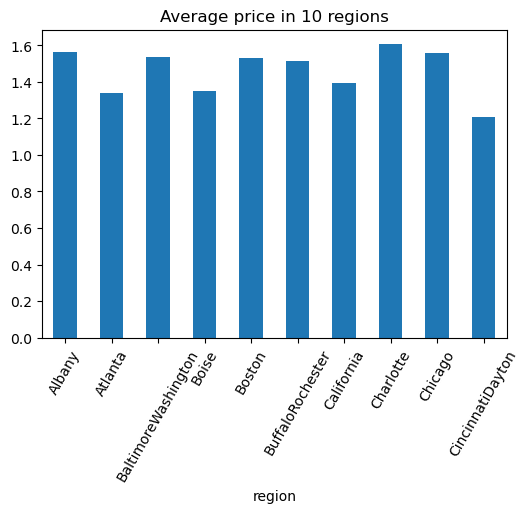

In [37]:
plt.figure(figsize=(6,4))
regionFilter.plot(kind='bar', title='Average price in 10 regions', rot=60)

### 3] Scatterplot

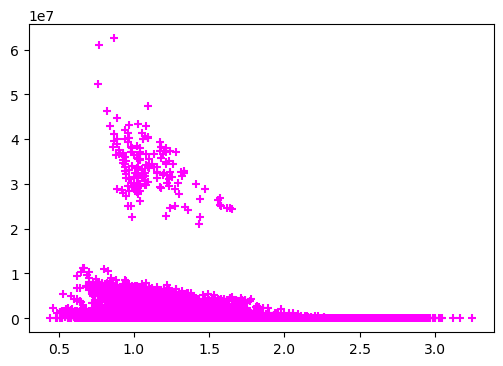

In [38]:
plt.figure(figsize=(6,4))
plt.scatter(data=df, x='AveragePrice', y='Total Volume', color='magenta', marker='+')

### 4] Distplot

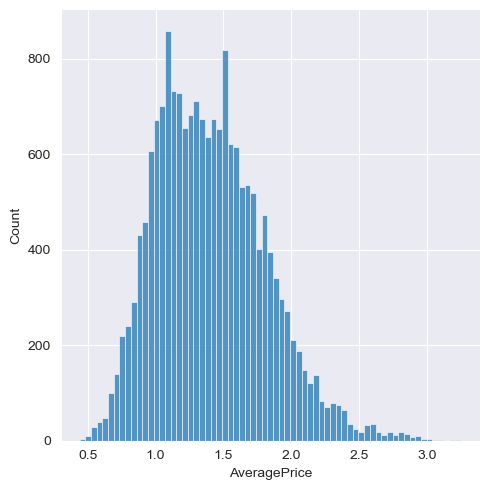

In [39]:
sns.set_style('darkgrid')
sns.displot(df['AveragePrice'])

### 5] Countplot

<Axes: xlabel='year', ylabel='count'>

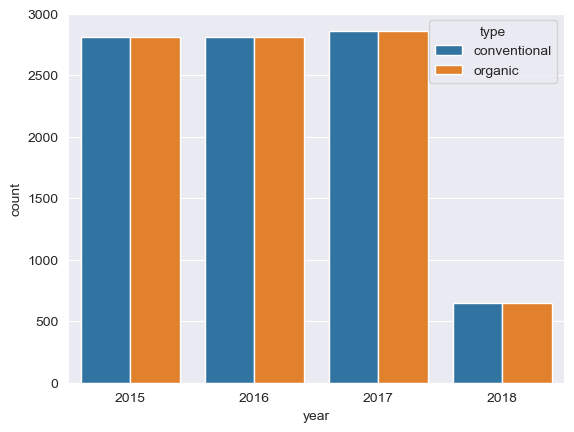

In [40]:
sns.countplot(x='year', hue='type', data=df)

In [41]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

### 6] Boxplot

<Axes: xlabel='AveragePrice', ylabel='type'>

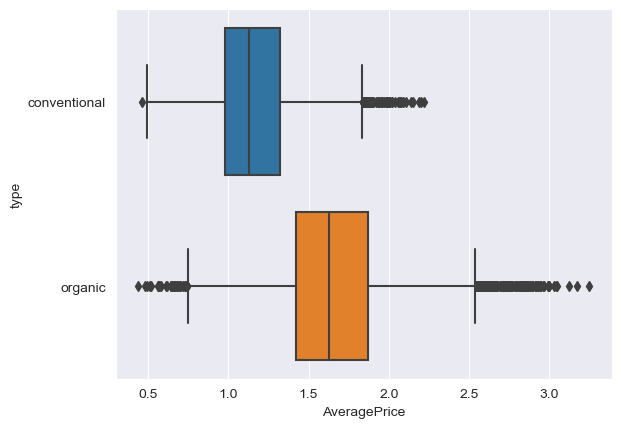

In [42]:
sns.boxplot(data=df, x='AveragePrice', y='type')

### 7] Boxenplot

<Axes: xlabel='year', ylabel='AveragePrice'>

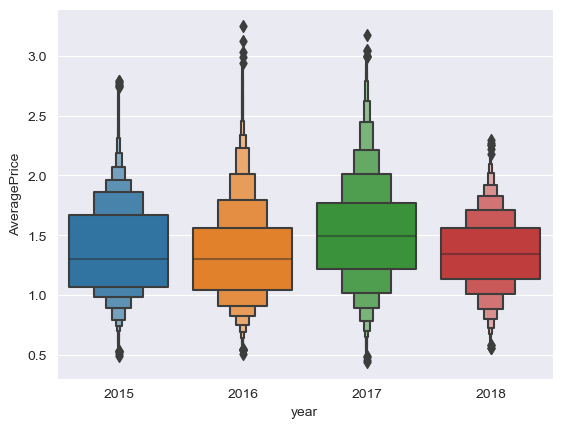

In [43]:
df.year = df.year.apply(str)
sns.boxenplot(x='year', y='AveragePrice', data=df)

## Dealing with categorical features:

In [44]:
df['type']= df['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
df.Date = df.Date.apply(pd.to_datetime)
df['Month']=df['Date'].apply(lambda x:x.month)
df.drop('Date',axis=1,inplace=True)

In [45]:
df.Month

0        12
1        12
2        12
3        12
4        11
         ..
18244     2
18245     1
18246     1
18247     1
18248     1
Name: Month, Length: 18249, dtype: int64

In [46]:
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [47]:
df.Month

0        DEC
1        DEC
2        DEC
3        DEC
4        NOV
        ... 
18244    FEB
18245    JAN
18246    JAN
18247    JAN
18248    JAN
Name: Month, Length: 18249, dtype: object

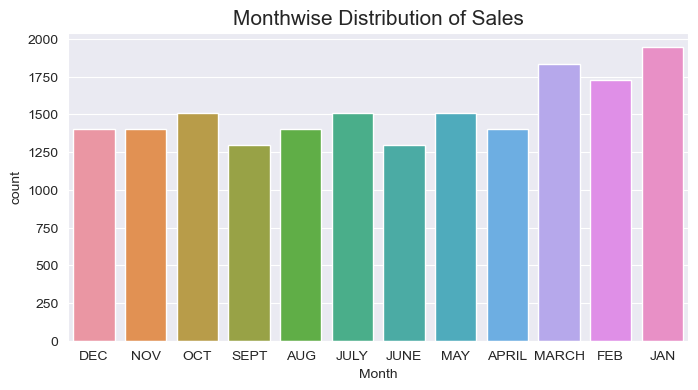

In [48]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Month')
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':15});

## Answering questions:

In [49]:
def get_average(df, column):
    return sum(df[column])/len(df)

In [50]:
def get_average_between_two_columns(df, column1, column2):
    List = list(df[column1].unique())
    average=[]
    
    for i in List:
        x = df[df[column1]==i]
        column1_average = get_average(x,column2)
        average.append(column1_average)
    
    df_column1_column2 = pd.DataFrame({'column1': List, 'column2' : average})
    
    column1_column2_sorted_index = df_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data=df_column1_column2.reindex(column1_column2_sorted_index)
    
    return column1_column2_sorted_data

In [51]:
def plot(data, xlabel, ylabel):
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(('Avarage '+ylabel+' of Avocado According to '+xlabel));

### Q.1] Which region are the lowest and highest prices of Avocado?

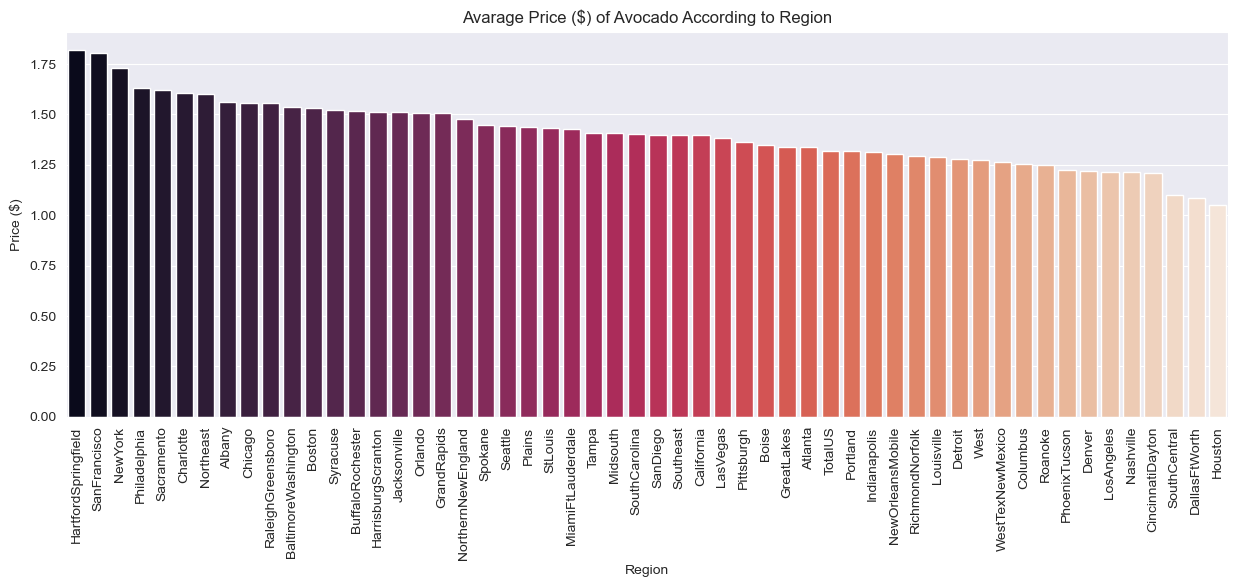

In [52]:
data1 = get_average_between_two_columns(df, 'region','AveragePrice')
plot(data1, 'Region', 'Price ($)')

### Q.2] What is the highest region of avocado production?

### Checking if there are outlier values or not

Text(0.5, 1.0, 'Figure: Boxplot repersenting outlier columns.')

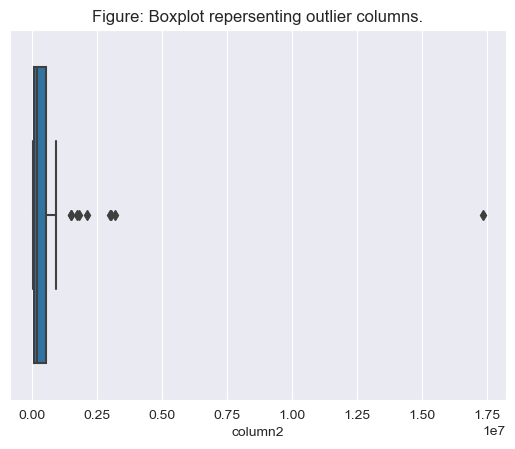

In [53]:
data2 = get_average_between_two_columns(df, 'region', 'Total Volume')
sns.boxplot(x=data2.column2).set_title("Figure: Boxplot repersenting outlier columns.")

In [54]:
outlier_region = data2[data2.column2>10000000]
print(outlier_region['column1'].iloc[-1], "is outlier value")

TotalUS is outlier value


### Remove the outlier values

In [55]:
outlier_region.index
data2 = data2.drop(outlier_region.index,axis=0)

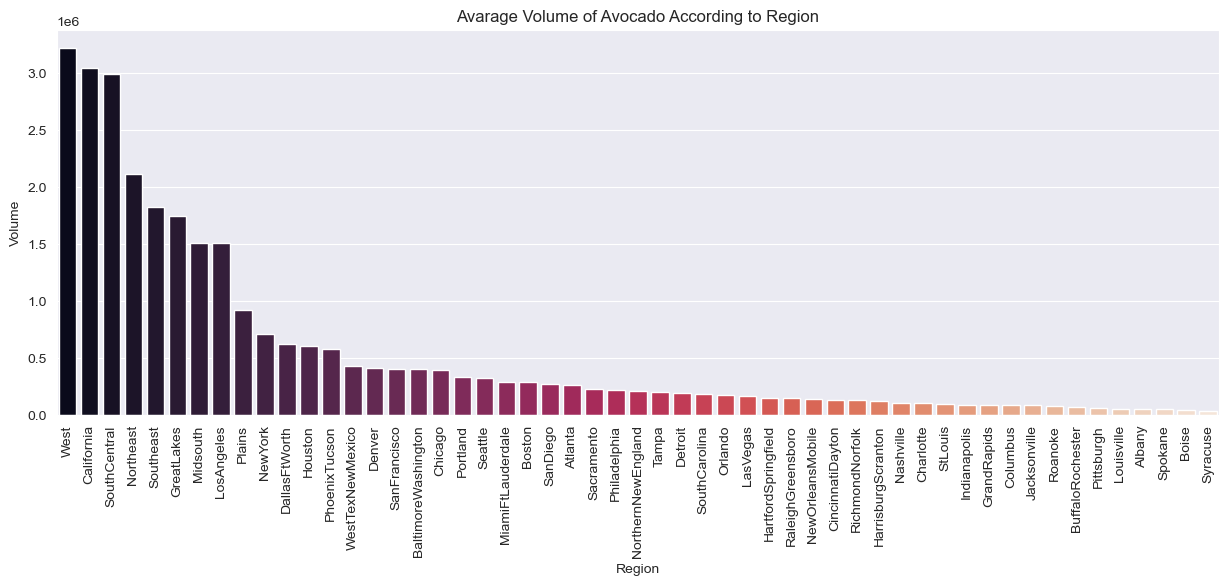

In [56]:
plot(data2,'Region','Volume')

### Q.3] What is the average avocado prices in each year?

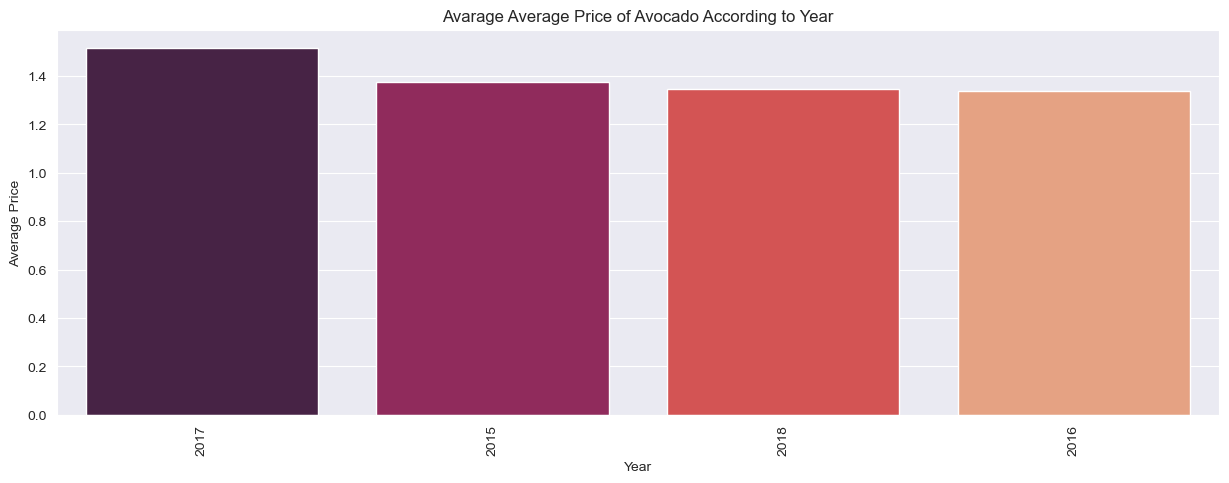

In [57]:
data3 = get_average_between_two_columns(df, 'year','AveragePrice')
plot(data3, 'Year', 'Average Price')

### Q.4] What is the average avocado volume in each year?

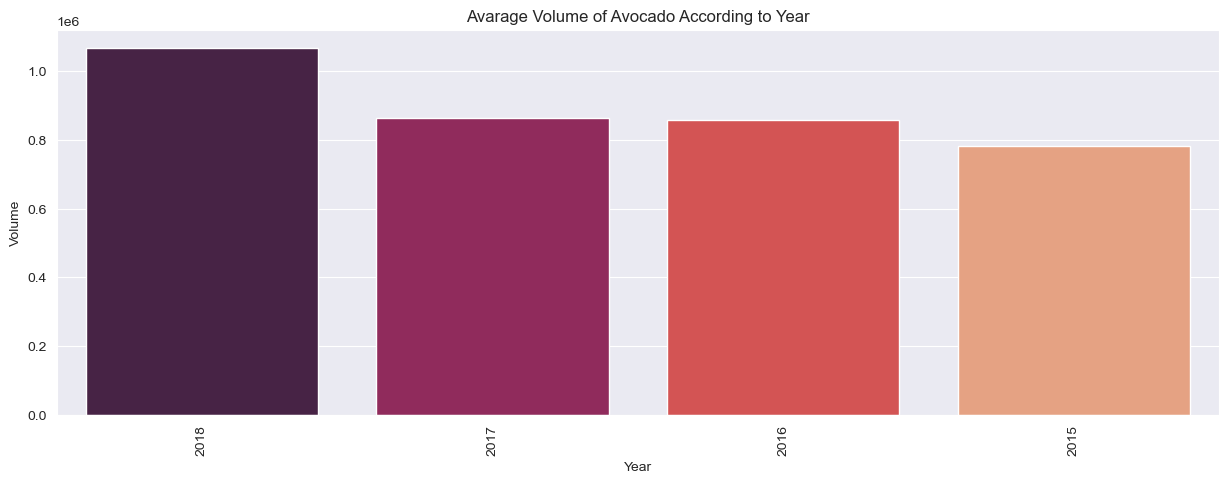

In [58]:
data4 = get_average_between_two_columns(df, 'year', 'Total Volume')
plot(data4, 'Year', 'Volume')

In [59]:
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePricePer100,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,133.0,DEC
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,135.0,DEC
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,93.0,DEC
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,108.0,DEC
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,128.0,NOV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico,163.0,FEB
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico,171.0,JAN
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico,187.0,JAN
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico,193.0,JAN


## Preparing data for ML models:

In [81]:
df3 = pd.read_csv(r'D:\7.30 PM DATA SCIENCE AND AI\DAILY SESSION MATERIALS\OCT\2nd- reg resume project\RESUME PROJECT -- AVOCADO PRICE PREDICTION\avocado.csv')

In [82]:
df3.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [83]:
df3.drop('Unnamed: 0', axis=1, inplace=True)
df3.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [84]:
df3['type']= df3['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
df3.Date = df3.Date.apply(pd.to_datetime)
df3['Month'] = df3['Date'].apply(lambda x:x.month)

df3.drop('Date',axis=1,inplace=True)
df3.Month = df3.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

### Creating dummy variables

In [85]:
dummies = pd.get_dummies(df3[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([df3[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = df3['AveragePrice']

### Splitting data into training and test set

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

### Standardizing the data

In [87]:
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X_train[cols_to_std])

X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

## 1] Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [107]:
y_pred_lr = lr.predict(X_test)

In [108]:
test_score_lr = r_score(y_test, y_pred_lr)

print("The Accuracy of the Linear Regression model is :", test_score_lr*100)

The Accuracy of the Linear Regression model is : 62.065515414794895


## 2] Decision Tree

In [89]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [91]:
y_pred_dt = dt.predict(X_test)

In [97]:
test_score_lr = r2_score(y_test, y_pred_dt)
print("The Accuracy of the Decision Tree model is :", test_score_lr*100)

The Accuracy of the Decision Tree model is : 74.7355845328653


## 3] Random Forest

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

In [95]:
y_pred_rf = rf.predict(X_test)

In [96]:
test_score_rf = r2_score(y_test, y_pred_rf)

print("The Accuracy of the Random Forest Regressor model is :", test_score_rf*100)

The Accuracy of the Random Forest Regressor model is : 88.47483006940503


## 4] Support Vector Regressor

In [98]:
from sklearn.svm import SVR
svr = SVR()

svr.fit(X_train, y_train)

SVR()

In [104]:
y_pred_svr = svr.predict(X_test)

In [105]:
test_score_svr = r2_score(y_test, y_pred_svr)

print("The Accuracy of the Support Vector Regressor model is :", test_score_svr*100)

The Accuracy of the Support Vector Regressor model is : 0.17878506553803408


## 5] K-Nearest Neighbor

In [101]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

knr.fit(X_train, y_train)

KNeighborsRegressor()

In [102]:
y_pred_knr = knr.predict(X_test)

In [103]:
test_score_knr = r2_score(y_test, y_pred_knr)

print("The Accuracy of the K-Nearest Neighbor model is :", test_score_knr*100)

The Accuracy of the K-Nearest Neighbor model is : 80.31412248604329


### To save time all models can be applied once using for loop

In [113]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(),
    'K-nearest Neighbors' : KNeighborsRegressor(),
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [114]:
results

,MAE,MSE,R2-score
Linear Regression,0.186,0.060,0.621
Decision Tree,0.131,0.039,0.753
Random Forest,0.097,0.018,0.885
Support Vector Machines,0.319,0.159,0.002
K-nearest Neighbors,0.125,0.031,0.803


In [117]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens', subset=['R2-score'])

,MAE,MSE,R2-score
Random Forest,0.097000,0.018000,0.885000
K-nearest Neighbors,0.125000,0.031000,0.803000
Decision Tree,0.131000,0.039000,0.753000
Linear Regression,0.186000,0.060000,0.621000
Support Vector Machines,0.319000,0.159000,0.002000


## Conclusion :

For this dataset, Random Forest algorithms has shown best results.